# Explore here

In [1]:
import pandas as pd 

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
total_data.to_csv("../data/raw/total_data.csv", index = False)

In [3]:
#getting dimesions 
total_data.shape

(48895, 16)

In [7]:
# get information about datta types and non null values 

total_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
#eliminating dupicates 

print(f"the number of duplicated Name record is: {total_data['name'].duplicated().sum()}")
print(f"the number of duplicated host ID record is :{total_data['host_id'].duplicated().sum()}")
print(f"the number of duplicated  ID record is :{total_data['id'].duplicated().sum()}")

the number of duplicated Name record is: 989
the number of duplicated host ID record is :11438
the number of duplicated  ID record is :0


In [9]:
#getting rid of irrelevant information 

total_data.drop(["id","name","host_name","last_review", "reviews_per_month"], axis = 1 , inplace= True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


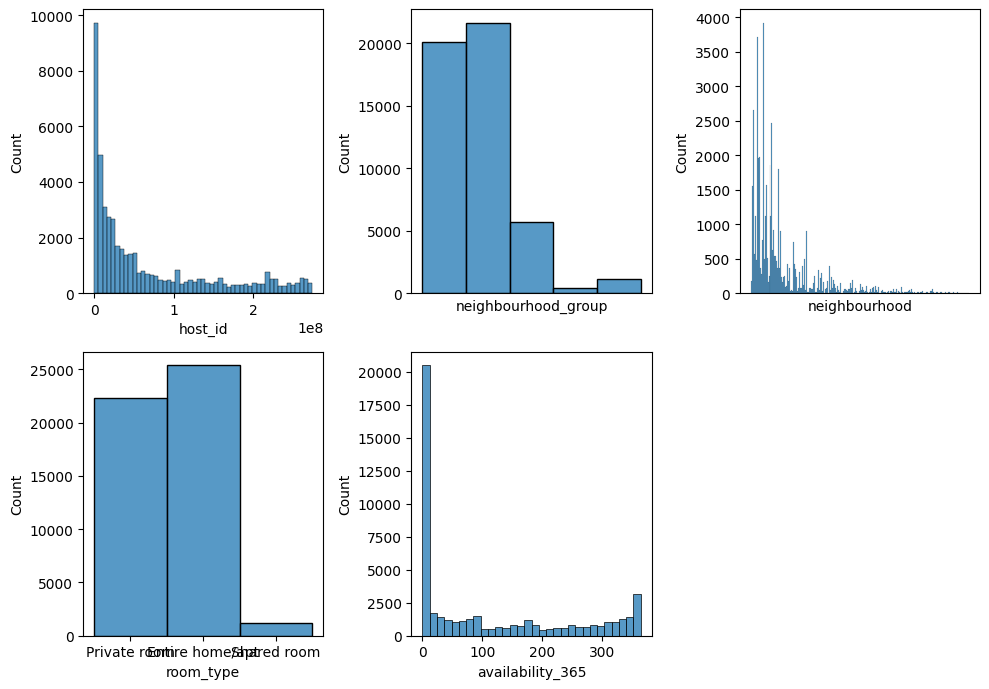

In [10]:
#anaylsing on categorical variables 

import matplotlib.pyplot as plt
import seaborn as sns 

fig, axis = plt.subplots(2,3, figsize=(10,7))

sns.histplot(ax= axis [0,0], data = total_data, x="host_id")
sns.histplot(ax= axis [0,1], data = total_data, x="neighbourhood_group").set_xticks([])
sns.histplot(ax= axis [0,2], data = total_data, x="neighbourhood").set_xticks([])
sns.histplot(ax= axis [1,0], data = total_data, x="room_type")
sns.histplot(ax= axis [1,1], data = total_data, x="availability_365")
fig.delaxes(axis[1,2])

plt.tight_layout()

plt.show()



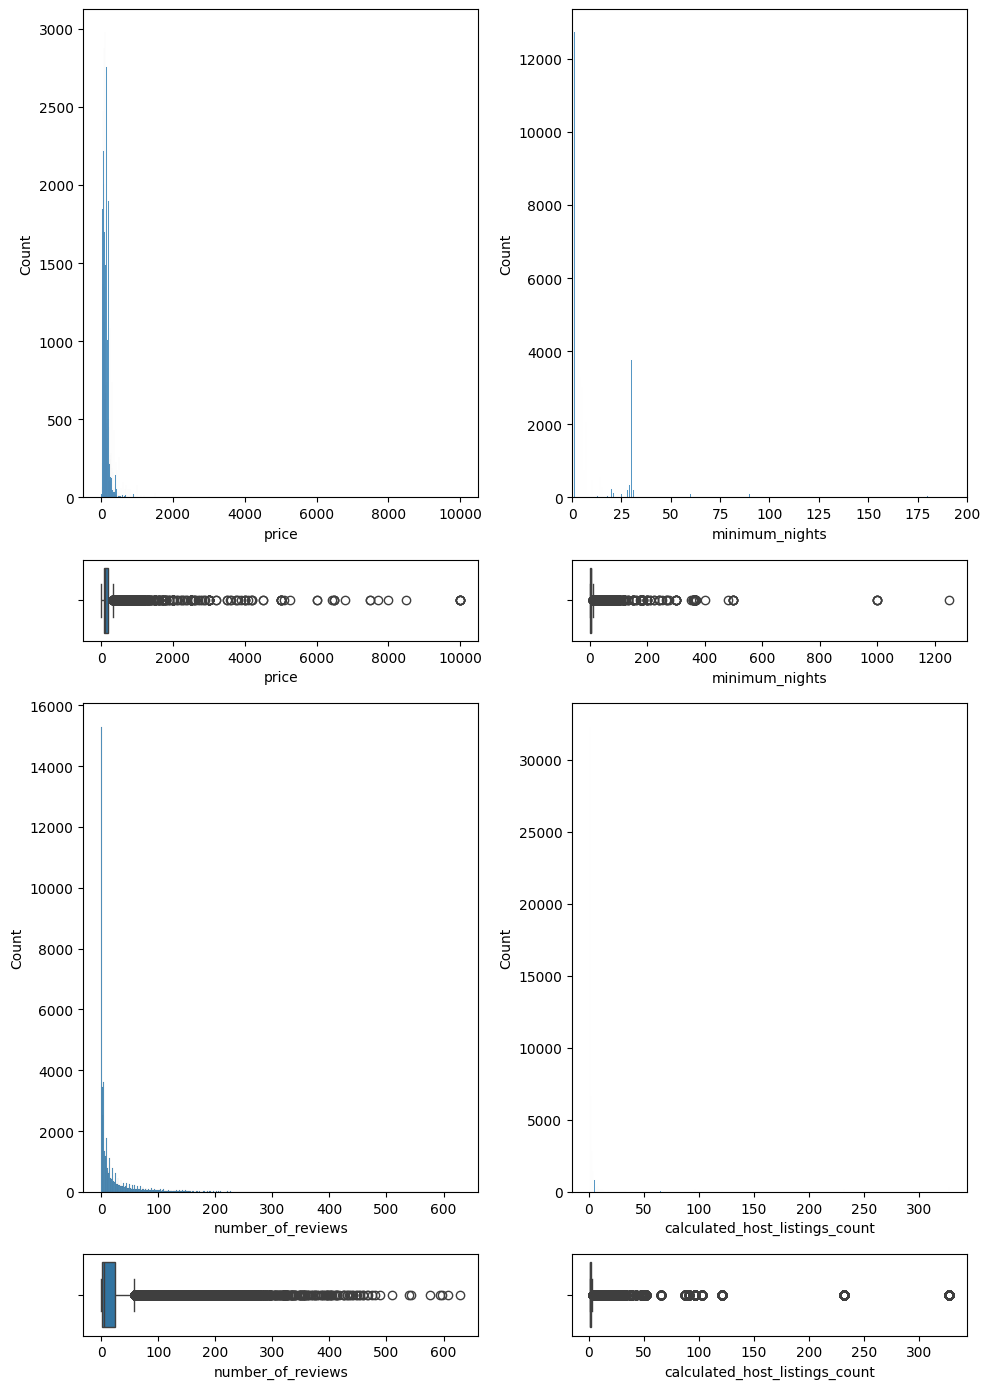

In [12]:
#anaylsing on numeric variables 

fig, axis = plt.subplots(4,2, figsize = (10,14), gridspec_kw={"height_ratios": [6,1,6,1]})

sns.histplot(ax= axis[0,0], data=total_data, x ="price")
sns.boxplot(ax= axis[1,0], data=total_data, x ="price")

sns.histplot(ax = axis [0,1], data= total_data, x="minimum_nights").set_xlim(0,200)
sns.boxplot(ax=axis [1,1], data = total_data, x= "minimum_nights")

sns.histplot(ax=axis[2,0], data= total_data, x = "number_of_reviews")
sns.boxplot(ax=axis [3,0], data= total_data, x="number_of_reviews")

sns.histplot(ax=axis [2,1], data = total_data, x = "calculated_host_listings_count")
sns.boxplot(ax=axis [3,1], data = total_data, x= "calculated_host_listings_count")

plt.tight_layout()

plt.show()



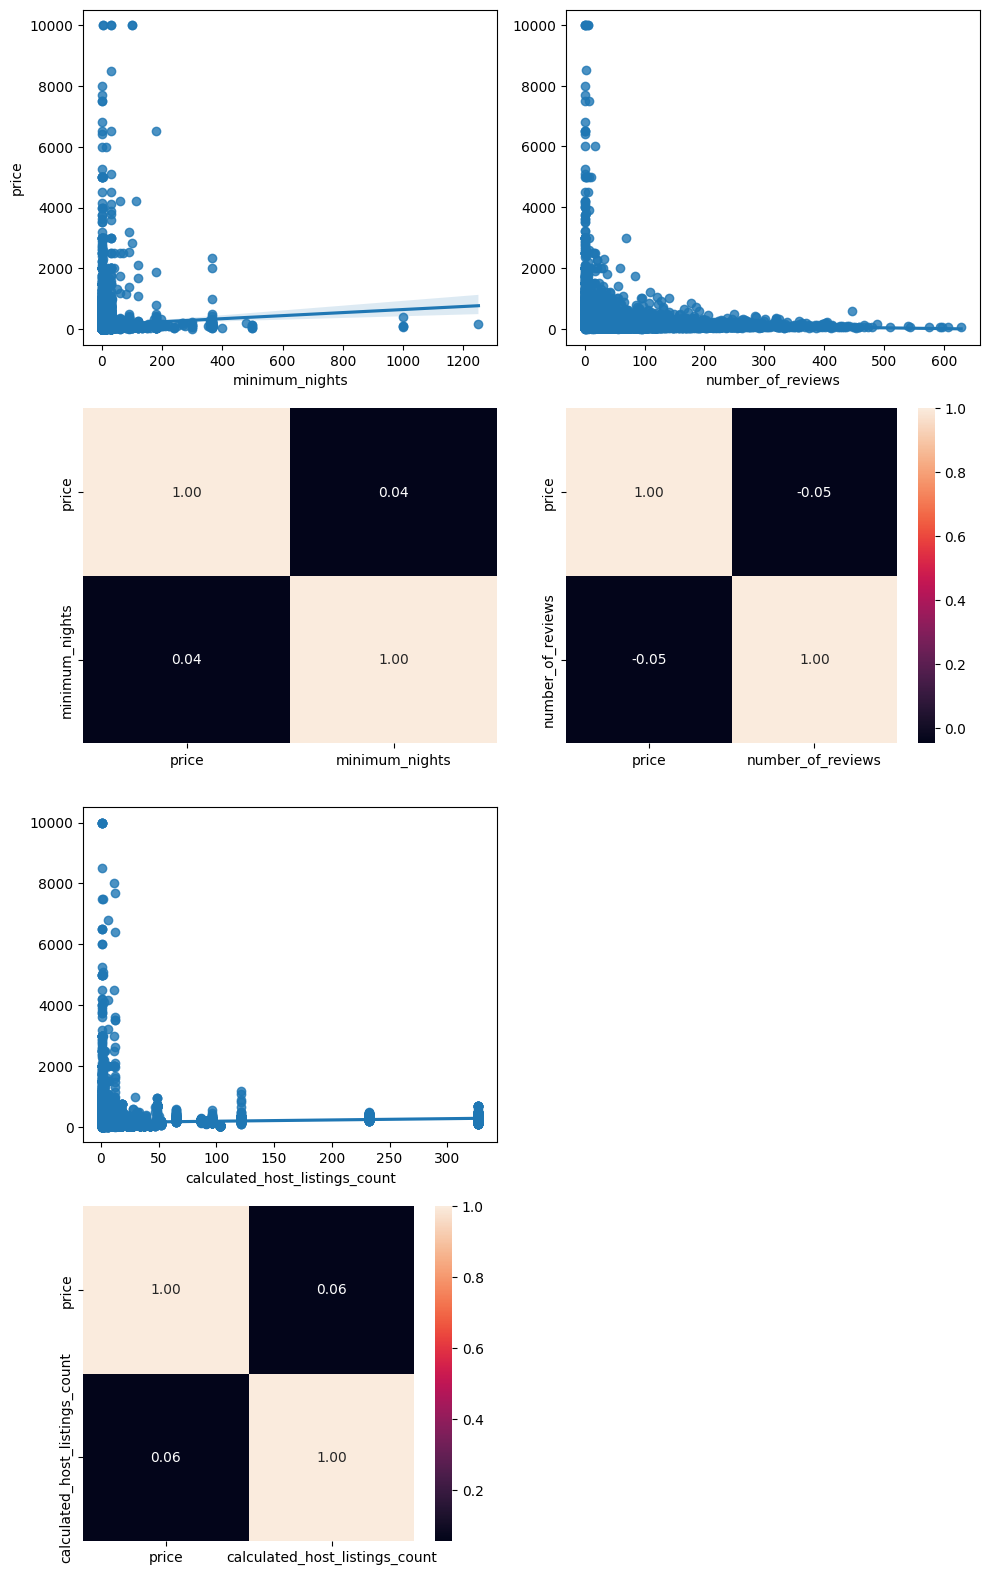

In [15]:
#numerical-numerical analysis 

fig, axis = plt.subplots(4,2, figsize=(10,16))

sns.regplot(ax= axis[0,0], data=total_data, x= "minimum_nights", y = "price")
sns.heatmap(total_data[["price","minimum_nights"]].corr(), annot=True, fmt =".2f", ax =axis[1,0], cbar=False)

sns.regplot(ax=axis [0,1], data=total_data, x ="number_of_reviews" , y="price").set(ylabel=None)
sns.heatmap(total_data[["price","number_of_reviews"]].corr(), annot=True,fmt=".2f",ax = axis[1,1])

sns.regplot(ax=axis[2,0],data=total_data,x="calculated_host_listings_count", y ="price").set(ylabel = None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot=True , fmt=".2f",ax =axis[3, 0]).set(ylabel=None)




fig.delaxes(axis[2,1])
fig.delaxes(axis[3,1])

plt.tight_layout()

plt.show()


